In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import StringIO
import time
plt.rcParams['figure.figsize'] = [5, 3] 

In [190]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
res = requests.get(url, verify=False)
text = StringIO(res.text)
data_df = pd.read_csv(text, header=None)
data_df.head(2)

/Applications/anaconda3/envs/m/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [191]:
print(data_df.shape)
print(len(data_df[4].unique()))

two_class = ['Iris-setosa', 'Iris-versicolor']
input_df = data_df[(data_df[4]==two_class[0])|(data_df[4]==two_class[1])]
print(input_df.shape)

print(len(input_df[4].unique()))

(150, 5)
3
(100, 5)
2


In [192]:
X = input_df.iloc[:, [0, 2]].values
y = np.where(input_df.iloc[:,4].values==two_class[0], 1, -1)
print(X.shape, y.shape)

(100, 2) (100,)


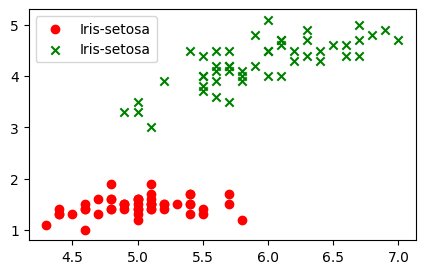

In [193]:
plt.scatter(X[:50,0], X[:50,1], marker='o', color='r', label=two_class[0])
plt.scatter(X[50:,0], X[50:,1], marker='x', color='g', label=two_class[0])
plt.legend(loc='upper left')
plt.show()

In [194]:
def plot_boundary(X, pnp, labels=two_class):
    plt.clf()
    x = np.linspace(1, 10, 100)
    y = (-pnp.w_[1]/pnp.w_[2]) * x - (pnp.w_[0]/pnp.w_[2])
    plt.plot(x, y)
    plt.scatter(X[:50,0], X[:50,1], marker='o', color='r', label=two_class[0])
    plt.scatter(X[50:,0], X[50:,1], marker='x', color='g', label=two_class[0])
    plt.legend(loc='upper left')
    plt.show()

In [195]:
class Perceptron:
    def __init__(self, eta=0.01, random_state=1, niter=10):
        self.eta = eta
        self.random_state = random_state
        self.niter = niter
    
    def fit(self, X, y):
        rgn = np.random.RandomState(self.random_state)
        self.w_ = rgn.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)
        self.errors_ = []

        for _ in range(self.niter):
            errors = 0
            for xi, yi in zip(X, y):
                diff = self.eta * (yi-self.predict(xi))
                self.w_[1:] += diff * xi
                self.w_[0] += diff
                errors += int(diff!=0.0)
            self.errors_.append(errors)            
    
    def net_input(self, x):
        return np.dot(self.w_[1:], x) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.net_input(x)>=0.0, 1, -1) 

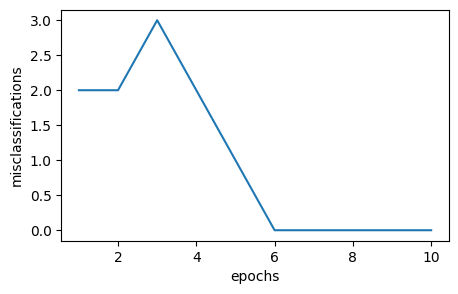

In [196]:
pnp = Perceptron(niter=10)
pnp.fit(X.copy(), y.copy())
plt.plot(range(1, len(pnp.errors_)+1), pnp.errors_)
plt.xlabel('epochs'); plt.ylabel('misclassifications')
plt.show()

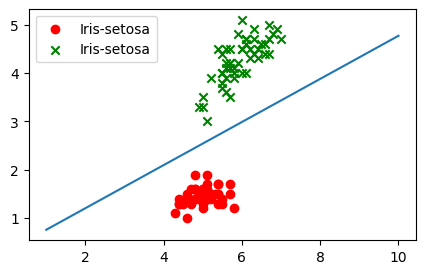

In [197]:
plot_boundary(X, pnp);

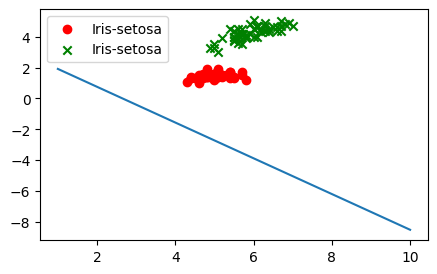

In [198]:
pnp = Perceptron(niter=0)
pnp.fit(X.copy(), y.copy())
plot_boundary(X, pnp);